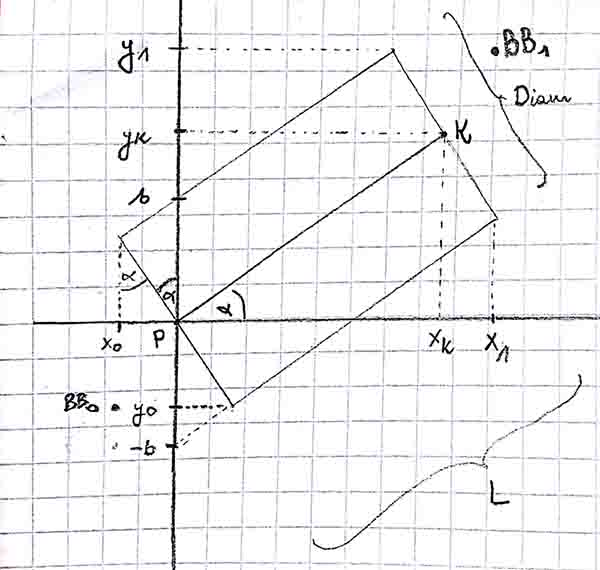

In [12]:
from IPython.display import Image
Image(filename='skewed_pipe_2d_fig_small.jpg', width=600)

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import ndimage

def NearWallMask(walls, distance):
    """
    Znajdowanie otoczenia sciany
    """
    r = distance
    hx, hy = np.mgrid[-r:(r+1), -r:(r+1)]
    radius = np.sqrt(hx**2 + hy**2 )
    radius[radius > r] = 0.0

    near_wall = ndimage.filters.convolve(walls.astype(np.uint8), radius, mode='constant') > 0
    mask = near_wall & (~walls)
    return mask

In [3]:
alpha = math.pi/3.5   # kat <0; pi/2)
L = 200               # dlugosc rury
Diam = 50             # srednica rury

In [4]:
assert 0 <= alpha < math.pi/2.
assert L > 0
assert Diam > 0

Prosta PK przechodzaca przez srodek rury i punkt (0,0):<br>
`y = tg(alpha) * x`

Proste równoległe do PK tworzące rurę:<br>
`y = tg(alpha) * x + y0`<br>
`y = tg(alpha) * x - y0`

Prosta prostopadła do PK przechodząca przez P:<br>
`y = -1./tg(alpha) * x`

Ostatnia prosta:<br>
`y = -1/tg(alpha) * (x-xk) + yk`

In [5]:
P = (0., 0.)
K = (L*math.cos(alpha),  L*math.sin(alpha))
b = Diam/(2*math.cos(alpha))
x0 = -Diam*math.sin(alpha)/2.
y0 = -Diam*math.cos(alpha)/2.
y1 = K[1]-y0
x1 = K[0]-x0
BB_0 = (x0, y0)
BB_1 = (x1, y1)

In [6]:
# wielkość Boundary Boxa
nx = int(math.ceil(BB_1[0]))-int(math.floor(BB_0[0]))+2
ny = int(math.ceil(BB_1[1]))-int(math.floor(BB_0[1]))+2
print nx, ny

x = np.linspace(BB_0[0], BB_1[0],nx)
y = np.linspace(BB_0[1], BB_1[1],ny)
X, Y = np.meshgrid(x,y)

167 190


In [7]:
# macierz wynikowa gdzie:
# 0: wall
# 1: fluid
# 2: in
# 3: out

# walls
D = np.zeros((ny,nx),dtype=np.int)
# fluid
D[np.logical_and.reduce( (-1/math.tan(alpha)*X<Y, 
                          -1/math.tan(alpha)*(X-K[0])+K[1]>Y, 
                          math.tan(alpha)*X-b<Y,
                          math.tan(alpha)*X+b>Y)
                       )]=1

PressureIn = np.zeros((ny,nx),dtype=np.int)
PressureIn[-1/math.tan(alpha)*X<Y] = True

PressureOut =  np.zeros((ny,nx),dtype=np.int)
PressureOut[-1/math.tan(alpha)*(X-K[0])+K[1]>Y] = True

maskIn = NearWallMask(PressureIn,2)
maskOut = NearWallMask(PressureOut,2)

# in
D[maskIn==True]=2
# out
D[maskOut==True]=3

(-20.0, 160.0, -50.0, 200.0)

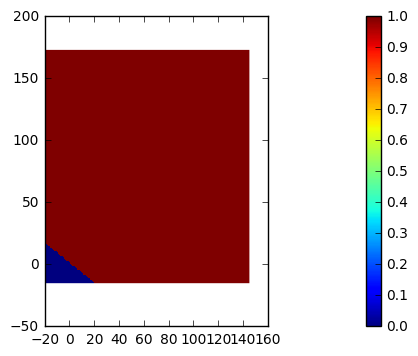

In [8]:
plt.imshow(PressureIn,origin='lower',extent=(BB_0[0], BB_1[0], BB_0[1], BB_1[1]),interpolation='nearest')

plt.colorbar()
plt.axis('scaled')

(-20.0, 160.0, -50.0, 200.0)

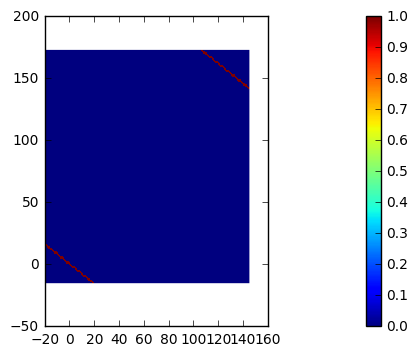

In [9]:
plt.imshow(maskIn+maskOut,origin='lower',extent=(BB_0[0], BB_1[0], BB_0[1], BB_1[1]),interpolation='nearest')

plt.colorbar()
plt.axis('scaled')

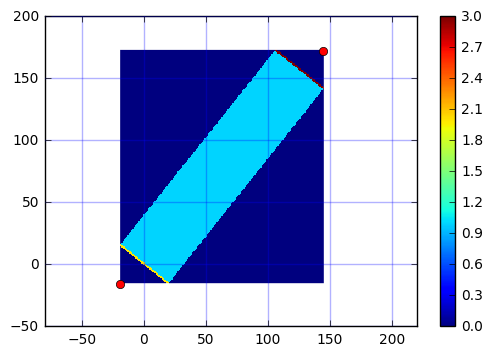

In [10]:
# BB
plt.plot((x0, x1), (y0, y1), 'ro')

# walls
# plt.plot((x0, x1+2*x0), (-y0, y1), 'r-',lw=2)
# plt.plot((-x0, x1), (y0, y1+2*y0), 'r-',lw=2)

# in & out
# plt.plot((x0, -x0), (-y0, y0), 'r-',lw=2)
# plt.plot((x1+2*x0, x1), (y1, y1+2*y0), 'r-',lw=2)

plt.imshow(D,origin='lower',extent=(BB_0[0], BB_1[0], BB_0[1], BB_1[1]),interpolation='nearest')

plt.axis('equal')
plt.grid(color='b', linestyle='-', linewidth=1, alpha = 0.3)
plt.colorbar()

In [11]:
filename = 'skewed_pipe_2d_geometry'

np.savez(filename,geo=D, alpha=alpha, D=Diam, L=L)
g = np.load(filename + '.npz')
print g['alpha']

0.897597901026
